**ZOMATO RESTAURANT SUCCESS**
**FACTORS ANALYSIS**


 Exploratory Data Analysis (EDA)
serves as an initial phase in the realm
of Machine Learning, extensively
employed to gain a profound
understanding of the dataset



In this project, we aim to analyze Zomato restaurant data to identify key factors
that contribute to the success of restaurants, as measured by their ratings. By
exploring various features such as location, cuisine, pricing, and service
offerings, we aim to provide insights that can help restaurant owners and
Zomato users make informed decisions.

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()

**Data Loading and** **Inspection**

In [ ]:
#Data Loading
data=pd.read_csv("zomato.csv")
data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [ ]:
data.head(15)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
6,3400296,Honeydew Restaurant,['Quick Bites'],https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,Very Good,647,46,0.0,1,-1
7,3400368,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,Good,617,18,0.0,-1,-1
8,3401284,Cake House,['Bakery'],https://www.zomato.com/agra/cake-house-2-civil...,"23/301, Wazirpura Rd, Judge Compound Chowraha,...",Agra,34,Civil Lines,27.204148,78.009025,...,2,Rs.,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,Average,322,14,0.0,1,-1
9,3400838,Sugar N Thyme,['Café'],https://www.zomato.com/agra/sugar-n-thyme-tajg...,"1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...",Agra,34,Tajganj,27.158243,78.045591,...,3,Rs.,"['No Alcohol Available', 'Dinner', 'Delivery',...",4.4,Very Good,289,324,0.0,1,-1


In [ ]:
data.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [ ]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [ ]:
#understanding structure of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [ ]:
data.shape

(211944, 26)

In [ ]:
data.count

<bound method DataFrame.count of           res_id                            name      establishment  \
0        3400299                     Bikanervala    ['Quick Bites']   
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
...          ...                             ...                ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khanda...   
1       https://www.zomato.com/agra/mama-chicken-mama-...   
2       https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3       https://www.zomato.com/agra/bhagat-halwai-civi...   
4       https://www.zomato.com/agra/the-salt-cafe-kitc...   
...                                                   ...   
211939  https://www.zomato.com/vadodara/kali-mirch-caf...   
211940  https://www.zomato.com/vadodara/raju-omlet-kar...   
211941  https://www.zomato.com/vadodara/the-grand-thak...   
211942  https://www.zomato.com/vadodara/subway-1-akota...   
211943  https://www.zomato.com/vadodara/freshcos-the-h...   

                                                  address      city  city_id  \
0       Kalyani Point, Near Tulsi Cinema, Bypass Road,...      Agra       34   
1             Main Market, Sadar Bazaar, Agra Cantt, Agra      Agra       34   
2       62/1, Near Easy Day, West Shivaji Nagar, Goalp...      Agra       34   
3       Near Anjana Cinema, Nehru Nagar, Civil Lines, ...      Agra       34   
4             1C,3rd Floor, Fatehabad Road, Tajganj, Agra      Agra       34   
...                                                   ...       ...      ...   
211939  Manu Smriti Complex, Near Navrachna School, GI...  Vadodara       32   
211940  Mahalaxmi Apartment, Opposite B O B, Karoli Ba...  Vadodara       32   
211941  3rd Floor, Shreem Shalini Mall, Opposite Conqu...  Vadodara       32   
211942  G-2, Vedant Platina, Near Cosmos, Akota, Vadodara  Vadodara       32   
211943  Shop 7, Ground Floor, Opposite Natubhai Circle...  Vadodara       32   

           locality   latitude  longitude  ... price_range  currency  \
0          Khandari  27.211450  78.002381  ...           2       Rs.   
1        Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2          Shahganj  27.182938  77.979684  ...           1       Rs.   
3       Civil Lines  27.205668  78.004799  ...           1       Rs.   
4           Tajganj  27.157709  78.052421  ...           3       Rs.   
...             ...        ...        ...  ...         ...       ...   
211939    Fatehgunj  22.336931  73.192356  ...           2       Rs.   
211940   Karelibaug  22.322455  73.197203  ...           1       Rs.   
211941     Alkapuri  22.310563  73.171163  ...           2       Rs.   
211942        Akota  22.270027  73.143068  ...           2       Rs.   
211943     Vadiwadi  22.309935  73.158768  ...           2       Rs.   

                                               highlights aggregate_rating  \
0       ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1       ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2       ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3       ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4       ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   
...                                                   ...              ...   
211939  [

**Data Cleaning**

In [ ]:
data.isnull().sum()

,0
res_id,0
name,0
establishment,0
url,0
address,134
city,0
city_id,0
locality,0
latitude,0
longitude,0


In [ ]:
data.isnull().sum()/len(data)*100

,0
res_id,0.000000
name,0.000000
establishment,0.000000
url,0.000000
address,0.063224
city,0.000000
city_id,0.000000
locality,0.000000
latitude,0.000000
longitude,0.000000


In [ ]:
#dropping out unimportant columns
data=data.drop(columns=["zipcode", "url", "address", "locality_verbose", "timings","city_id"])

In [ ]:
#getting column names in dataset
data.columns

Index(['res_id', 'name', 'establishment', 'city', 'locality', 'latitude',
       'longitude', 'country_id', 'cuisines', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [ ]:
data.head()

,res_id,name,establishment,city,locality,latitude,longitude,country_id,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],Agra,Khandari,27.211450,78.002381,1,"North Indian, South Indian, Mithai, Street Foo...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],Agra,Agra Cantt,27.160569,78.011583,1,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],Agra,Shahganj,27.182938,77.979684,1,"Fast Food, Mithai",300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],Agra,Civil Lines,27.205668,78.004799,1,"Desserts, Bakery, Fast Food, South Indian",300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],Agra,Tajganj,27.157709,78.052421,1,"North Indian, Continental, Italian",1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [ ]:
#filling out missing values in dataset
data["cuisines"]=data["cuisines"].fillna("unspecified")

In [ ]:
data["establishment"]=data["establishment"].str.strip("[]").str.replace("'","").str.strip()

In [ ]:
#filling out missing numerical data with mean
data["opentable_support"]=data["opentable_support"].fillna(data["opentable_support"].mean())

**Data Visualization**

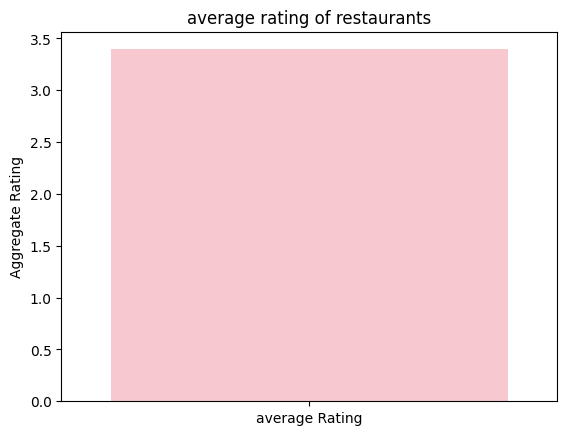

In [ ]:
avg_rating=data["aggregate_rating"].mean()
sns.barplot(x=["average Rating"], y=avg_rating, color="pink")
plt.ylabel("Aggregate Rating")
plt.title("average rating of restaurants")
plt.show()

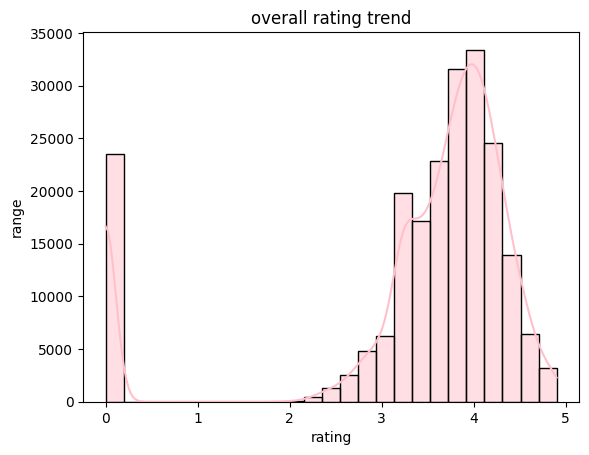

In [ ]:

sns.histplot(x=data["aggregate_rating"], bins=25, kde=True, color="pink")
plt.xlabel("rating")
plt.ylabel("range")
plt.title("overall rating trend")
plt.show()


In [ ]:
top_cities=data["city"].value_counts().head()

/tmp/ipython-input-72-2122955608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="pastel")


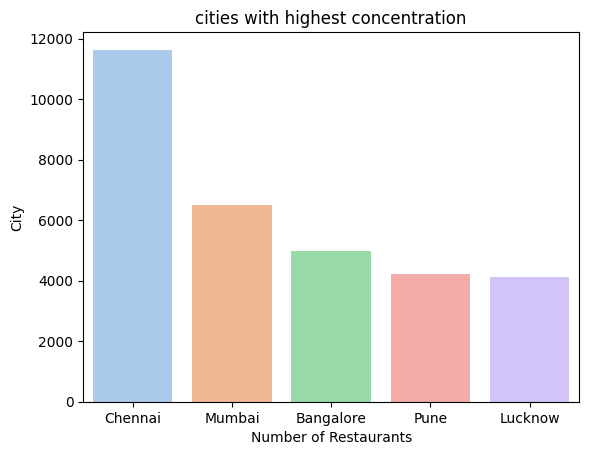

In [ ]:
#Identifing the city with the highest concentration of restaurants and Visualizing the distribution of restaurant ratings across different cities
sns.barplot(x=top_cities.index, y=top_cities.values, palette="pastel")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("cities with highest concentration")
plt.show()

In [ ]:
rate=data[data["city"].isin(top_cities.index)].groupby(["city"])["aggregate_rating"].mean()


/tmp/ipython-input-74-2209545718.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rate.values, x=rate.index, palette="pastel")


Text(0.5, 1.0, 'rating across different cities')

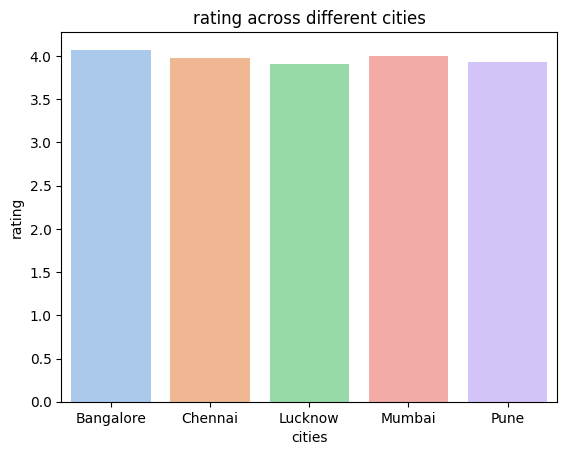

In [ ]:
sns.barplot(y=rate.values, x=rate.index, palette="pastel")
plt.ylabel("rating")
plt.xlabel("cities")
plt.title("rating across different cities")


/tmp/ipython-input-75-1134067404.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total.index, y=total.values, palette="pastel")


Text(0.5, 1.0, 'Cuisine Analysis')

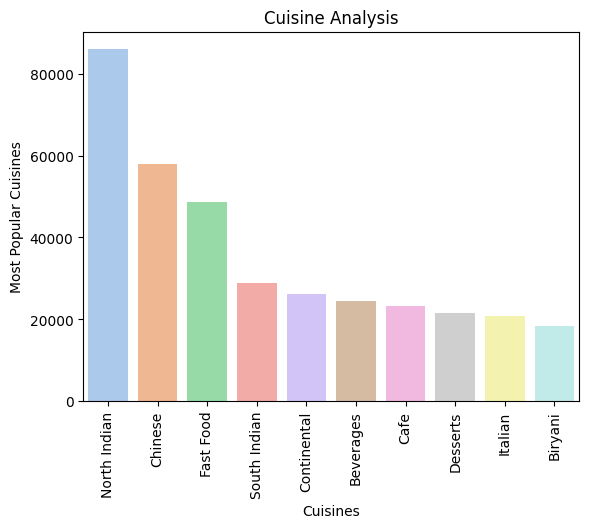

In [ ]:
# the most popular cuisines among the listed restaurants
cuisine=data["cuisines"].astype(str).str.strip("[]").str.split(',').explode().str.strip().str.strip("'")
all=cuisine.explode()
total=all.value_counts().head(10)
sns.barplot(x=total.index, y=total.values, palette="pastel")
plt.xticks(rotation=90)
plt.xlabel("Cuisines")
plt.ylabel("Most Popular Cuisines")
plt.title("Cuisine Analysis")

/tmp/ipython-input-76-2116143195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_relation.values, y=price_relation.index, palette="pastel")


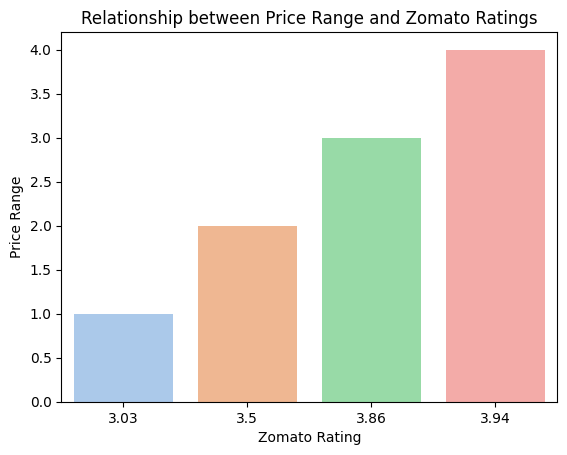

In [ ]:
#Analysing the relationship between price range and restaurant ratings
price_relation=data.groupby(["price_range"])["aggregate_rating"].mean().round(2)
sns.barplot(x=price_relation.values, y=price_relation.index, palette="pastel")
plt.title("Relationship between Price Range and Zomato Ratings")
plt.xlabel("Zomato Rating")
plt.ylabel("Price Range")
plt.show()

/tmp/ipython-input-77-231084309.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=range.index, y=range.values, palette="pastel")


Text(0.5, 0, 'Price Range')

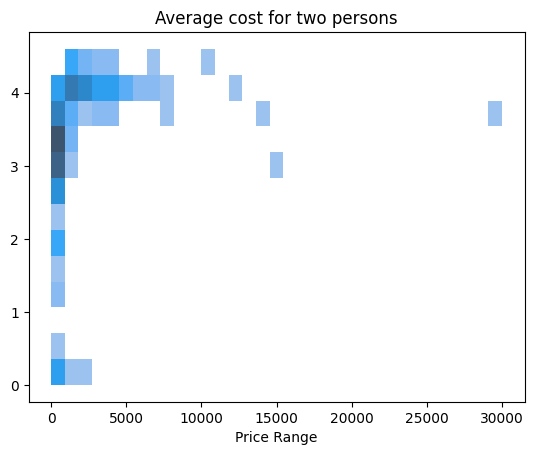

In [ ]:
range=data.groupby(data["average_cost_for_two"])["aggregate_rating"].mean()
sns.histplot(x=range.index, y=range.values, palette="pastel")
plt.title("Average cost for two persons")
plt.xlabel("Price Range")



/tmp/ipython-input-78-2051886356.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["establishment"], y=data["aggregate_rating"], palette="pastel")


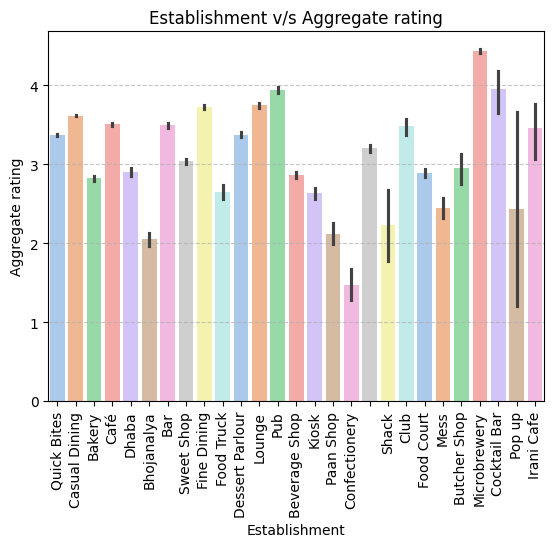

In [ ]:
sns.barplot(x=data["establishment"], y=data["aggregate_rating"], palette="pastel")
plt.xticks(rotation=90)
plt.ylabel("Aggregate rating")
plt.xlabel("Establishment")
plt.title("Establishment v/s Aggregate rating")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-79-3381821439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_dist.index, y=rating_dist.values, palette="pastel")


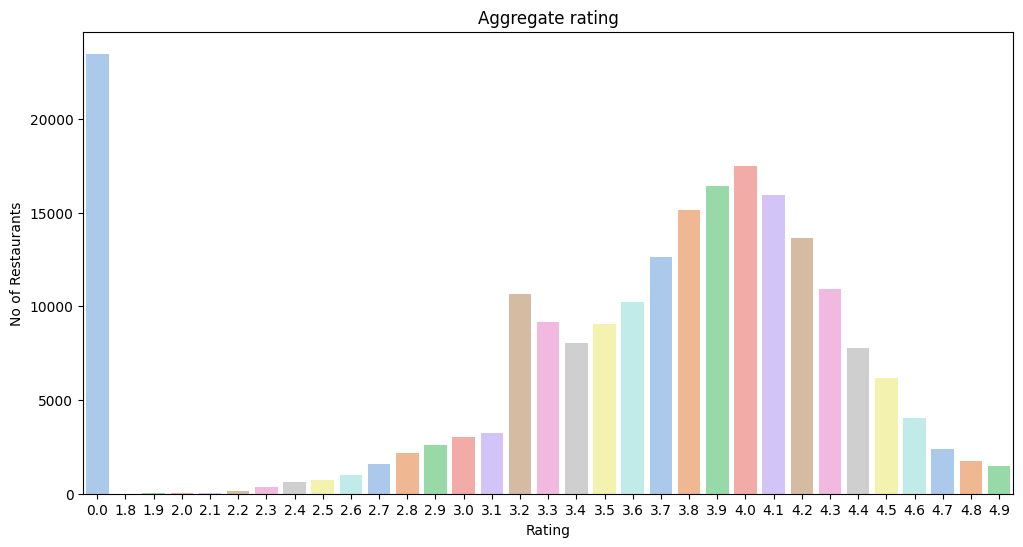

In [ ]:
rating_dist = data["aggregate_rating"].astype(float).value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=rating_dist.index, y=rating_dist.values, palette="pastel")
plt.title("Aggregate rating")
plt.xlabel("Rating")
plt.ylabel("No of Restaurants")
plt.show()


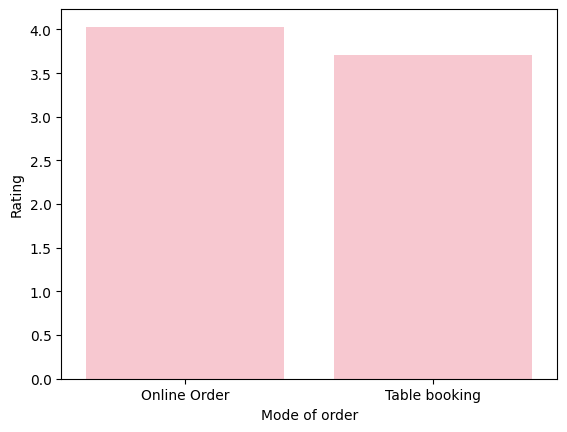

In [ ]:
#Online Order and Table Booking
data["highlights"]=data["highlights"].str.strip("[]")
data["highlights"]=data["highlights"].str.split(',')
explode_data=data.explode("highlights")
explode_data["highlights"]=explode_data["highlights"].str.replace("'","").str.strip()

x=explode_data[explode_data["highlights"]=="Table booking recommended"]["aggregate_rating"].mean()
z=explode_data[explode_data["highlights"]=="Delivery"]["aggregate_rating"].mean()
sns.barplot(x=["Online Order","Table booking"], y=[x, z], color="pink")
plt.xlabel("Mode of order")
plt.ylabel("Rating")
plt.show()



/tmp/ipython-input-81-1207230667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_restaurant.index, y=Top_restaurant.values, palette="pastel")


Text(0, 0.5, 'No of outlets')

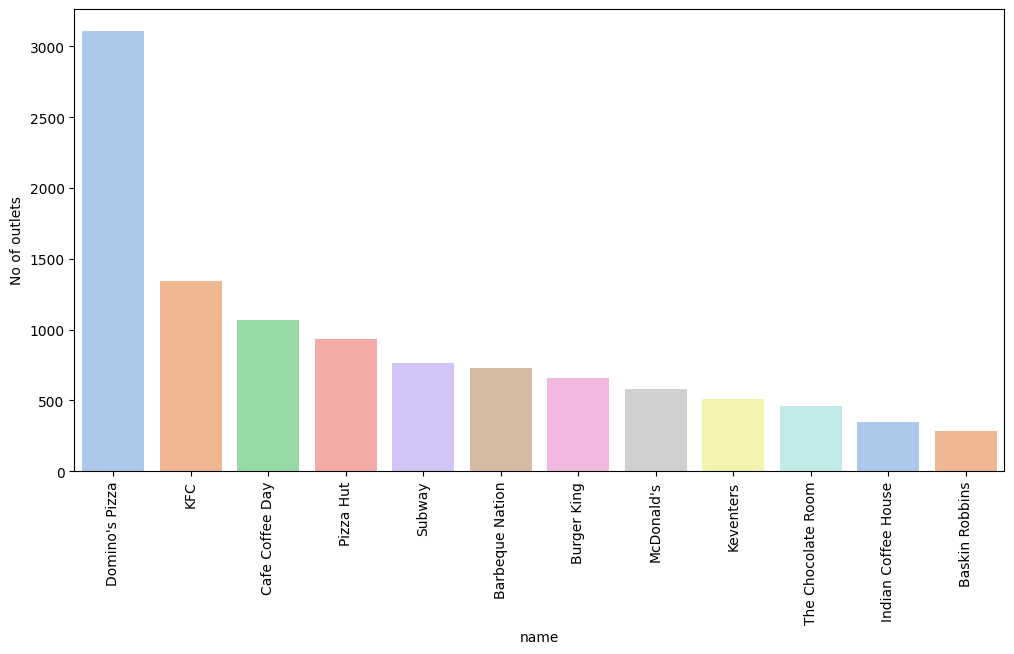

In [ ]:
#top restaurant chains based on the number of outlets
plt.figure(figsize=(12,6))
Top_restaurant=data["name"].value_counts().head(12)
sns.barplot(x=Top_restaurant.index, y=Top_restaurant.values, palette="pastel")
plt.xticks(rotation=90)
plt.ylabel("No of outlets")

/tmp/ipython-input-82-1031548916.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y= top_rate.values,x=top_rate.index ,palette="pastel")


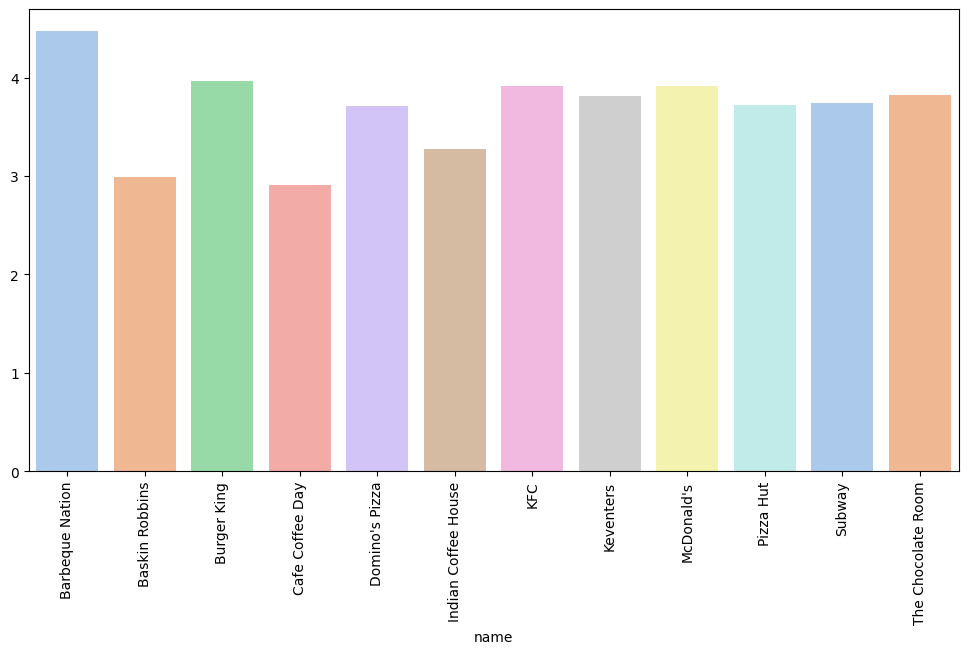

In [ ]:
plt.figure(figsize=(12,6))
top_rate=data[data["name"].isin(Top_restaurant.index)].groupby("name")["aggregate_rating"].mean()
sns.barplot(y= top_rate.values,x=top_rate.index ,palette="pastel")
plt.xticks(rotation=90)
plt.show()


/tmp/ipython-input-85-500148592.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=immunity.values, x=immunity.index, palette="pastel")


Text(0.5, 1.0, 'Distribution')

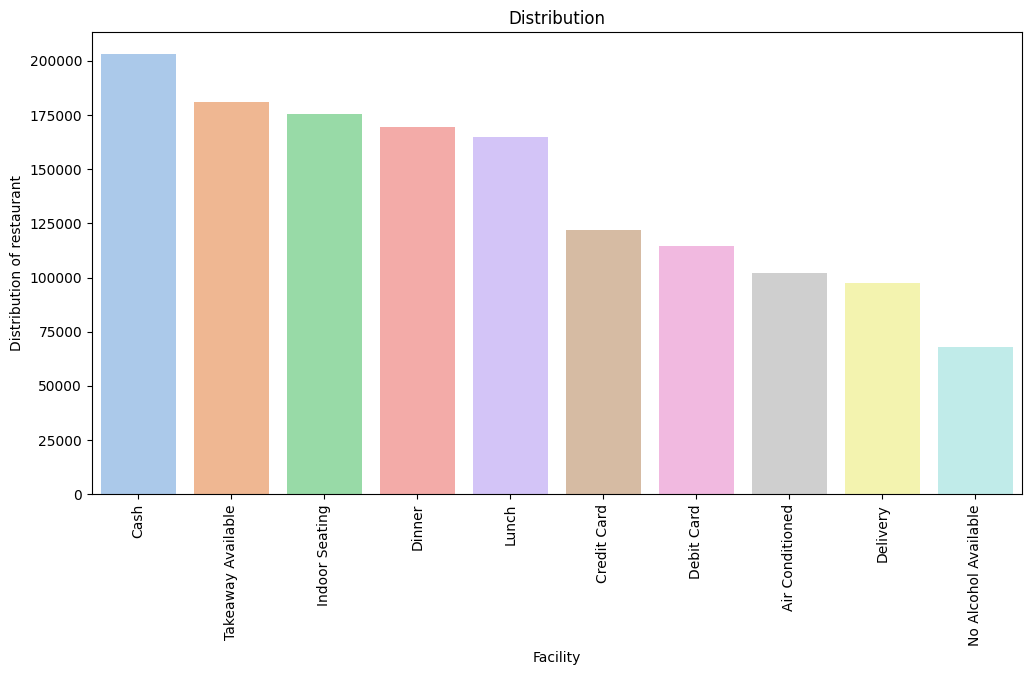

In [ ]:
plt.figure(figsize=(12,6))
feature=data["highlights"].astype(str).str.strip("[]").str.replace("'", "").str.split(",").explode().str.strip().str.strip('"').str.strip()
immunity=feature.value_counts().head(10)
sns.barplot(y=immunity.values, x=immunity.index, palette="pastel")
plt.xticks(rotation=90)
plt.ylabel("Distribution of restaurant")
plt.xlabel("Facility")
plt.title("Distribution")


/tmp/ipython-input-86-896712655.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.index, y=corr.values, palette="pastel")


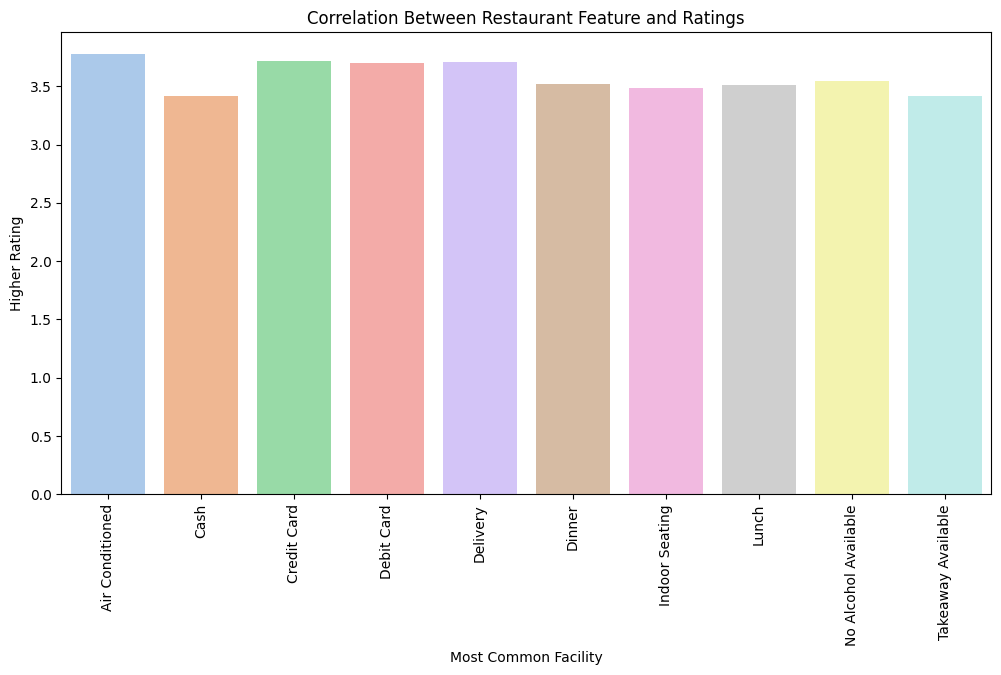

In [ ]:
plt.figure(figsize=(12,6))
corr=explode_data[explode_data["highlights"].isin(immunity.index)].groupby(["highlights"])["aggregate_rating"].mean()
sns.barplot(x=corr.index, y=corr.values, palette="pastel")
plt.xticks(rotation=90)
plt.ylabel("Higher Rating")
plt.xlabel("Most Common Facility")
plt.title("Correlation Between Restaurant Feature and Ratings")
plt.show()

**Insights**



*    Restaurants that allow table booking tend to have higher rated.
*   Restaurants offering online ordering have better ratings.

*   Urban areas host top-rated places.
*    Mid-priced restaurants often get higher ratings than very cheap or expensive ones.

*   Strong correlation between number of votes and rating.
*   Fast food have lower ratings compared to dine-in setups.














